In [ ]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm

def reconnet_block(x, reuse=False, training=True):
    with tf.variable_scope('recon_block', reuse=reuse):
        e1 = tf.layers.dense(inputs=x, units=1089, activation=tf.nn.leaky_relu, 
                             kernel_initializer=tf.random_normal_initializer(stddev=0.05))
        e1 = tf.reshape(e1, (-1, 33,33,1))
        e2 = tf.layers.conv2d(e1, 64, 11, padding='same', activation=tf.nn.leaky_relu, 
                              kernel_initializer=tf.random_normal_initializer(stddev=0.1))
        e3 = tf.layers.conv2d(e2, 32, 1, padding='same', activation=tf.nn.leaky_relu, 
                              kernel_initializer=tf.random_normal_initializer(stddev=0.1))
        e4 = tf.layers.conv2d(e3, 1, 7, padding='same', activation=tf.nn.leaky_relu, 
                              kernel_initializer=tf.random_normal_initializer(stddev=0.1))
        e5 = tf.layers.conv2d(e4, 64, 11, padding='same', activation=tf.nn.leaky_relu, 
                              kernel_initializer=tf.random_normal_initializer(stddev=0.1))
        e6 = tf.layers.conv2d(e5, 32, 1, padding='same', activation=tf.nn.leaky_relu, 
                              kernel_initializer=tf.random_normal_initializer(stddev=0.1))
        e7 = tf.layers.conv2d(e6, 1, 7, padding='same', activation=tf.nn.leaky_relu, 
                              kernel_initializer=tf.random_normal_initializer(stddev=0.1))
        
        return e7
    
def normalize(v):
    return v / np.sqrt(v.dot(v))

# generates input (Compressed sensing measurement vector) of image patch
def generate_phi():
    np.random.seed(333)
    # Drawing random bits from Gaussian (Normal) Distribution 
    phi = np.random.normal(size=(272, 1089))  
    n = len(phi)
    
    # perform Gramm-Schmidt orthonormalization
    
    phi[0, :] = normalize(phi[0, :])
    
    for i in range(1, n):
        Ai = phi[i, :]
        for j in range(0, i):
            Aj = phi[j, :]
            t = Ai.dot(Aj)
            Ai = Ai - t * Aj
        phi[i, :] = normalize(Ai)
        
    return phi

def divide_img_to_blocks(image, stride=14, filter_size=33):
    (h,w) = image.shape
    # Crop image to make div. by 3
    image = image[0:h-h%3, 0:w-w%3]
    (h,w) = image.shape
    h_iters = ((h - filter_size) // stride) + 1
    w_iters = ((w - filter_size) // stride) + 1
    blocks = []
    for i in range(h_iters):
        for j in range(w_iters):
            blocks.append(image[stride*i:filter_size+stride*i, stride*j:filter_size+stride*j])
    
    return np.asarray(blocks)

  0%|          | 0/250 [00:00<?, ?it/s]

epoch no 1
Loss is: 0.079685472
Loss is: 0.049860630
Loss is: 0.034677118
Loss is: 0.023719899


  0%|          | 1/250 [00:02<11:56,  2.88s/it]

Loss is: 0.019222382
epoch no 2
Loss is: 0.019014666
Loss is: 0.016932117
Loss is: 0.017095333
Loss is: 0.013628728


  1%|          | 2/250 [00:05<11:10,  2.70s/it]

Loss is: 0.011834897
epoch no 3
Loss is: 0.013863866
Loss is: 0.012670277
Loss is: 0.013733085
Loss is: 0.011049960


  1%|          | 3/250 [00:07<10:36,  2.58s/it]

Loss is: 0.009597089
epoch no 4
Loss is: 0.011920038
Loss is: 0.010909418
Loss is: 0.012130245
Loss is: 0.009689267


  2%|▏         | 4/250 [00:09<10:14,  2.50s/it]

Loss is: 0.008408112
epoch no 5
Loss is: 0.010736891
Loss is: 0.009787190
Loss is: 0.011010736
Loss is: 0.008773821


  2%|▏         | 5/250 [00:12<09:57,  2.44s/it]

Loss is: 0.007565193
epoch no 6
Loss is: 0.009826696
Loss is: 0.008947162
Loss is: 0.010127277
Loss is: 0.008061890


  2%|▏         | 6/250 [00:14<09:45,  2.40s/it]

Loss is: 0.006899004
epoch no 7
Loss is: 0.009062040
Loss is: 0.008250199
Loss is: 0.009356782
Loss is: 0.007431980


  3%|▎         | 7/250 [00:16<09:34,  2.37s/it]

Loss is: 0.006358761
epoch no 8
Loss is: 0.008400797
Loss is: 0.007643548
Loss is: 0.008697547
Loss is: 0.006887968


  3%|▎         | 8/250 [00:18<09:27,  2.35s/it]

Loss is: 0.005929559
epoch no 9
Loss is: 0.007840695
Loss is: 0.007142772
Loss is: 0.008167740
Loss is: 0.006449869


  4%|▎         | 9/250 [00:21<09:21,  2.33s/it]

Loss is: 0.005574883
epoch no 10
Loss is: 0.007380651
Loss is: 0.006748035
Loss is: 0.007738282
Loss is: 0.006098465


  4%|▍         | 10/250 [00:23<09:16,  2.32s/it]

Loss is: 0.005284254
epoch no 11
Loss is: 0.006999327
Loss is: 0.006424856
Loss is: 0.007382154
Loss is: 0.005807717


  4%|▍         | 11/250 [00:25<09:12,  2.31s/it]

Loss is: 0.005052323
epoch no 12
Loss is: 0.006679840
Loss is: 0.006154853
Loss is: 0.007091543
Loss is: 0.005575999


  5%|▍         | 12/250 [00:28<09:09,  2.31s/it]

Loss is: 0.004861294
epoch no 13
Loss is: 0.006412962
Loss is: 0.005927065
Loss is: 0.006845312
Loss is: 0.005378665


  5%|▌         | 13/250 [00:30<09:05,  2.30s/it]

Loss is: 0.004696586
epoch no 14
Loss is: 0.006181706
Loss is: 0.005731557
Loss is: 0.006637529
Loss is: 0.005202739


  6%|▌         | 14/250 [00:32<09:01,  2.29s/it]

Loss is: 0.004551382
epoch no 15
Loss is: 0.005974647
Loss is: 0.005559102
Loss is: 0.006448507
Loss is: 0.005052524


  6%|▌         | 15/250 [00:34<08:59,  2.29s/it]

Loss is: 0.004422491
epoch no 16
Loss is: 0.005794149
Loss is: 0.005406023
Loss is: 0.006296732
Loss is: 0.004917272


  6%|▋         | 16/250 [00:37<08:56,  2.29s/it]

Loss is: 0.004307751
epoch no 17
Loss is: 0.005636638
Loss is: 0.005268850
Loss is: 0.006146464
Loss is: 0.004789910


  7%|▋         | 17/250 [00:39<08:54,  2.29s/it]

Loss is: 0.004208630
epoch no 18
Loss is: 0.005497874
Loss is: 0.005144362
Loss is: 0.006012959
Loss is: 0.004678356


  7%|▋         | 18/250 [00:41<08:53,  2.30s/it]

Loss is: 0.004119691
epoch no 19
Loss is: 0.005366961
Loss is: 0.005038318
Loss is: 0.005886326
Loss is: 0.004576612


  8%|▊         | 19/250 [00:44<08:51,  2.30s/it]

Loss is: 0.004030252
epoch no 20
-------Saving model--------
Loss is: 0.005240064
Loss is: 0.004938140
Loss is: 0.005775676
Loss is: 0.004490829


  8%|▊         | 20/250 [00:47<09:48,  2.56s/it]

Loss is: 0.003945130
epoch no 21
Loss is: 0.005129981
Loss is: 0.004850233
Loss is: 0.005673296
Loss is: 0.004431963


  8%|▊         | 21/250 [00:49<09:28,  2.48s/it]

Loss is: 0.003872785
epoch no 22
Loss is: 0.005029156
Loss is: 0.004769216
Loss is: 0.005578527
Loss is: 0.004364645


  9%|▉         | 22/250 [00:51<09:13,  2.43s/it]

Loss is: 0.003807635
epoch no 23
Loss is: 0.004936343
Loss is: 0.004694253
Loss is: 0.005492586
Loss is: 0.004282242


  9%|▉         | 23/250 [00:54<09:03,  2.39s/it]

Loss is: 0.003745204
epoch no 24
Loss is: 0.004849742
Loss is: 0.004624713
Loss is: 0.005410988
Loss is: 0.004220269


 10%|▉         | 24/250 [00:56<08:55,  2.37s/it]

Loss is: 0.003694371
epoch no 25
Loss is: 0.004771561
Loss is: 0.004560393
Loss is: 0.005337970
Loss is: 0.004157450


 10%|█         | 25/250 [00:58<08:49,  2.35s/it]

Loss is: 0.003652607
epoch no 26
Loss is: 0.004700670
Loss is: 0.004499897
Loss is: 0.005273024
Loss is: 0.004092311


 10%|█         | 26/250 [01:01<08:44,  2.34s/it]

Loss is: 0.003611344
epoch no 27
Loss is: 0.004632731
Loss is: 0.004444717
Loss is: 0.005220306
Loss is: 0.004028211


 11%|█         | 27/250 [01:03<08:40,  2.33s/it]

Loss is: 0.003557051
epoch no 28
Loss is: 0.004573581
Loss is: 0.004399063
Loss is: 0.005166747
Loss is: 0.003979404


 11%|█         | 28/250 [01:05<08:37,  2.33s/it]

Loss is: 0.003511396
epoch no 29
Loss is: 0.004515310
Loss is: 0.004353505
Loss is: 0.005107717
Loss is: 0.003934454


 12%|█▏        | 29/250 [01:08<08:31,  2.32s/it]

Loss is: 0.003470762
epoch no 30
Loss is: 0.004459228
Loss is: 0.004305423
Loss is: 0.005055397
Loss is: 0.003892167


 12%|█▏        | 30/250 [01:10<08:26,  2.30s/it]

Loss is: 0.003433972
epoch no 31
Loss is: 0.004407806
Loss is: 0.004261103
Loss is: 0.005004054
Loss is: 0.003852810


 12%|█▏        | 31/250 [01:12<08:22,  2.30s/it]

Loss is: 0.003399589
epoch no 32
Loss is: 0.004360050
Loss is: 0.004218416
Loss is: 0.004954606
Loss is: 0.003815802


 13%|█▎        | 32/250 [01:14<08:20,  2.30s/it]

Loss is: 0.003366801
epoch no 33
Loss is: 0.004314965
Loss is: 0.004178548
Loss is: 0.004906612
Loss is: 0.003780599


 13%|█▎        | 33/250 [01:17<08:16,  2.29s/it]

Loss is: 0.003335129
epoch no 34
Loss is: 0.004271928
Loss is: 0.004141401
Loss is: 0.004860770
Loss is: 0.003747192


 14%|█▎        | 34/250 [01:19<08:15,  2.29s/it]

Loss is: 0.003304733
epoch no 35
Loss is: 0.004231385
Loss is: 0.004106745
Loss is: 0.004816828
Loss is: 0.003715433


 14%|█▍        | 35/250 [01:21<08:11,  2.29s/it]

Loss is: 0.003275765
epoch no 36
Loss is: 0.004191993
Loss is: 0.004073314
Loss is: 0.004774627
Loss is: 0.003684776


 14%|█▍        | 36/250 [01:24<08:08,  2.28s/it]

Loss is: 0.003247702
epoch no 37
Loss is: 0.004154739
Loss is: 0.004040630
Loss is: 0.004735466
Loss is: 0.003654524


 15%|█▍        | 37/250 [01:26<08:05,  2.28s/it]

Loss is: 0.003221141
epoch no 38
Loss is: 0.004119216
Loss is: 0.004009184
Loss is: 0.004697666
Loss is: 0.003625898


 15%|█▌        | 38/250 [01:28<08:03,  2.28s/it]

Loss is: 0.003194740
epoch no 39
Loss is: 0.004085168
Loss is: 0.003978626
Loss is: 0.004660741
Loss is: 0.003598725


 16%|█▌        | 39/250 [01:30<08:01,  2.28s/it]

Loss is: 0.003169392
epoch no 40
-------Saving model--------
Loss is: 0.004051982
Loss is: 0.003949622
Loss is: 0.004625104
Loss is: 0.003572364


 16%|█▌        | 40/250 [01:33<08:42,  2.49s/it]

Loss is: 0.003145283
epoch no 41
Loss is: 0.004019570
Loss is: 0.003921736
Loss is: 0.004590948
Loss is: 0.003546208


 16%|█▋        | 41/250 [01:36<08:28,  2.43s/it]

Loss is: 0.003122073
epoch no 42
Loss is: 0.003988472
Loss is: 0.003894231
Loss is: 0.004556535
Loss is: 0.003521622


 17%|█▋        | 42/250 [01:38<08:17,  2.39s/it]

Loss is: 0.003098958
epoch no 43
Loss is: 0.003960159
Loss is: 0.003867999
Loss is: 0.004522603
Loss is: 0.003497712


 17%|█▋        | 43/250 [01:40<08:09,  2.36s/it]

Loss is: 0.003077029
epoch no 44
Loss is: 0.003932143
Loss is: 0.003843321
Loss is: 0.004490270
Loss is: 0.003474036


 18%|█▊        | 44/250 [01:43<08:03,  2.35s/it]

Loss is: 0.003056396
epoch no 45
Loss is: 0.003905441
Loss is: 0.003819451
Loss is: 0.004459383
Loss is: 0.003451206


 18%|█▊        | 45/250 [01:45<07:58,  2.34s/it]

Loss is: 0.003036491
epoch no 46
Loss is: 0.003878986
Loss is: 0.003796457
Loss is: 0.004428244
Loss is: 0.003429545


 18%|█▊        | 46/250 [01:47<07:55,  2.33s/it]

Loss is: 0.003016414
epoch no 47
Loss is: 0.003854057
Loss is: 0.003774261
Loss is: 0.004397479
Loss is: 0.003408109


 19%|█▉        | 47/250 [01:50<07:52,  2.33s/it]

Loss is: 0.002996305
epoch no 48
Loss is: 0.003829953
Loss is: 0.003752581
Loss is: 0.004367562
Loss is: 0.003387604


 19%|█▉        | 48/250 [01:52<07:47,  2.32s/it]

Loss is: 0.002976866
epoch no 49
Loss is: 0.003806917
Loss is: 0.003732068
Loss is: 0.004337667
Loss is: 0.003367549


 20%|█▉        | 49/250 [01:54<07:43,  2.31s/it]

Loss is: 0.002957378
epoch no 50
Loss is: 0.003785021
Loss is: 0.003712248
Loss is: 0.004309884
Loss is: 0.003347694


 20%|██        | 50/250 [01:56<07:40,  2.30s/it]

Loss is: 0.002939749
epoch no 51
Loss is: 0.003762670
Loss is: 0.003693035
Loss is: 0.004282725
Loss is: 0.003328548


 20%|██        | 51/250 [01:59<07:37,  2.30s/it]

Loss is: 0.002921627
epoch no 52
Loss is: 0.003741388
Loss is: 0.003674137
Loss is: 0.004255948
Loss is: 0.003309969


 21%|██        | 52/250 [02:01<07:34,  2.30s/it]

Loss is: 0.002904579
epoch no 53
Loss is: 0.003720199
Loss is: 0.003656115
Loss is: 0.004230191
Loss is: 0.003291579


 21%|██        | 53/250 [02:03<07:31,  2.29s/it]

Loss is: 0.002888464
epoch no 54
Loss is: 0.003699359
Loss is: 0.003638601
Loss is: 0.004203988
Loss is: 0.003274052


 22%|██▏       | 54/250 [02:06<07:28,  2.29s/it]

Loss is: 0.002871677
epoch no 55
Loss is: 0.003679934
Loss is: 0.003621461
Loss is: 0.004178419
Loss is: 0.003257009


 22%|██▏       | 55/250 [02:08<07:25,  2.29s/it]

Loss is: 0.002855488
epoch no 56
Loss is: 0.003661220
Loss is: 0.003605124
Loss is: 0.004154029
Loss is: 0.003240041


 22%|██▏       | 56/250 [02:10<07:24,  2.29s/it]

Loss is: 0.002840530
epoch no 57
Loss is: 0.003642399
Loss is: 0.003588985
Loss is: 0.004130704
Loss is: 0.003223919


 23%|██▎       | 57/250 [02:12<07:22,  2.29s/it]

Loss is: 0.002825824
epoch no 58
Loss is: 0.003623997
Loss is: 0.003573148
Loss is: 0.004108201
Loss is: 0.003207628


 23%|██▎       | 58/250 [02:15<07:19,  2.29s/it]

Loss is: 0.002811611
epoch no 59
Loss is: 0.003605498
Loss is: 0.003557626
Loss is: 0.004086059
Loss is: 0.003191664


 24%|██▎       | 59/250 [02:17<07:16,  2.28s/it]

Loss is: 0.002798182
epoch no 60
-------Saving model--------
Loss is: 0.003587351
Loss is: 0.003542728
Loss is: 0.004063779
Loss is: 0.003176505


 24%|██▍       | 60/250 [02:20<07:54,  2.50s/it]

Loss is: 0.002784628
epoch no 61
Loss is: 0.003570236
Loss is: 0.003527993
Loss is: 0.004042564
Loss is: 0.003161950


 24%|██▍       | 61/250 [02:22<07:39,  2.43s/it]

Loss is: 0.002771160
epoch no 62
Loss is: 0.003552900
Loss is: 0.003513961
Loss is: 0.004021871
Loss is: 0.003147582


 25%|██▍       | 62/250 [02:25<07:27,  2.38s/it]

Loss is: 0.002757867
epoch no 63
Loss is: 0.003536110
Loss is: 0.003499844
Loss is: 0.004000537
Loss is: 0.003133305


 25%|██▌       | 63/250 [02:27<07:18,  2.35s/it]

Loss is: 0.002745155
epoch no 64
Loss is: 0.003519775
Loss is: 0.003485671
Loss is: 0.003980416
Loss is: 0.003119755


 26%|██▌       | 64/250 [02:29<07:12,  2.32s/it]

Loss is: 0.002732881
epoch no 65
Loss is: 0.003503595
Loss is: 0.003471848
Loss is: 0.003961176
Loss is: 0.003106076


 26%|██▌       | 65/250 [02:31<07:06,  2.31s/it]

Loss is: 0.002720948
epoch no 66
Loss is: 0.003487576
Loss is: 0.003458143
Loss is: 0.003942181
Loss is: 0.003093295


 26%|██▋       | 66/250 [02:34<07:02,  2.30s/it]

Loss is: 0.002709288
epoch no 67
Loss is: 0.003472203
Loss is: 0.003445079
Loss is: 0.003924546
Loss is: 0.003080184


 27%|██▋       | 67/250 [02:36<06:58,  2.29s/it]

Loss is: 0.002698165
epoch no 68
Loss is: 0.003457107
Loss is: 0.003431578
Loss is: 0.003907321
Loss is: 0.003067234


 27%|██▋       | 68/250 [02:38<06:54,  2.28s/it]

Loss is: 0.002688013
epoch no 69
Loss is: 0.003440894
Loss is: 0.003418083
Loss is: 0.003891652
Loss is: 0.003054437


 28%|██▊       | 69/250 [02:40<06:51,  2.28s/it]

Loss is: 0.002678521
epoch no 70
Loss is: 0.003424798
Loss is: 0.003404864
Loss is: 0.003877139
Loss is: 0.003041827


 28%|██▊       | 70/250 [02:43<06:48,  2.27s/it]

Loss is: 0.002671004
epoch no 71
Loss is: 0.003408069
Loss is: 0.003391342
Loss is: 0.003868860
Loss is: 0.003028133


 28%|██▊       | 71/250 [02:45<06:47,  2.28s/it]

Loss is: 0.002675271
epoch no 72
Loss is: 0.003392123
Loss is: 0.003388672
Loss is: 0.003852922
Loss is: 0.003020255


 29%|██▉       | 72/250 [02:47<06:47,  2.29s/it]

Loss is: 0.002662555
epoch no 73
Loss is: 0.003385806
Loss is: 0.003381423
Loss is: 0.003817570
Loss is: 0.003005723


 29%|██▉       | 73/250 [02:50<06:45,  2.29s/it]

Loss is: 0.002648676
epoch no 74
Loss is: 0.003370648
Loss is: 0.003366881
Loss is: 0.003805727
Loss is: 0.002995676


 30%|██▉       | 74/250 [02:52<06:42,  2.29s/it]

Loss is: 0.002639789
epoch no 75
Loss is: 0.003357106
Loss is: 0.003353796
Loss is: 0.003791323
Loss is: 0.002984965


 30%|███       | 75/250 [02:54<06:41,  2.30s/it]

Loss is: 0.002630567
epoch no 76
Loss is: 0.003343514
Loss is: 0.003340716
Loss is: 0.003777394
Loss is: 0.002974505


 30%|███       | 76/250 [02:56<06:40,  2.30s/it]

Loss is: 0.002621425
epoch no 77
Loss is: 0.003330433
Loss is: 0.003328407
Loss is: 0.003763237
Loss is: 0.002964074


 31%|███       | 77/250 [02:59<06:37,  2.30s/it]

Loss is: 0.002612930
epoch no 78
Loss is: 0.003317582
Loss is: 0.003316503
Loss is: 0.003748969
Loss is: 0.002953913


 31%|███       | 78/250 [03:01<06:35,  2.30s/it]

Loss is: 0.002604980
epoch no 79
Loss is: 0.003305080
Loss is: 0.003305228
Loss is: 0.003734146
Loss is: 0.002944083


 32%|███▏      | 79/250 [03:03<06:33,  2.30s/it]

Loss is: 0.002596612
epoch no 80
-------Saving model--------
Loss is: 0.003292759
Loss is: 0.003294107
Loss is: 0.003719280
Loss is: 0.002934074


 32%|███▏      | 80/250 [03:06<07:08,  2.52s/it]

Loss is: 0.002587827
epoch no 81
Loss is: 0.003280591
Loss is: 0.003283165
Loss is: 0.003704974
Loss is: 0.002924250


 32%|███▏      | 81/250 [03:09<06:54,  2.45s/it]

Loss is: 0.002579850
epoch no 82
Loss is: 0.003268628
Loss is: 0.003272423
Loss is: 0.003691369
Loss is: 0.002914667


 33%|███▎      | 82/250 [03:11<06:44,  2.41s/it]

Loss is: 0.002571355
epoch no 83
Loss is: 0.003256510
Loss is: 0.003261509
Loss is: 0.003677830
Loss is: 0.002905214


 33%|███▎      | 83/250 [03:13<06:36,  2.37s/it]

Loss is: 0.002563780
epoch no 84
Loss is: 0.003244952
Loss is: 0.003251052
Loss is: 0.003664635
Loss is: 0.002895750


 34%|███▎      | 84/250 [03:16<06:30,  2.36s/it]

Loss is: 0.002555907
epoch no 85
Loss is: 0.003233402
Loss is: 0.003240488
Loss is: 0.003652027
Loss is: 0.002886505


 34%|███▍      | 85/250 [03:18<06:25,  2.34s/it]

Loss is: 0.002547959
epoch no 86
Loss is: 0.003222239
Loss is: 0.003230280
Loss is: 0.003639160
Loss is: 0.002877362


 34%|███▍      | 86/250 [03:20<06:22,  2.33s/it]

Loss is: 0.002540113
epoch no 87
Loss is: 0.003211244
Loss is: 0.003219953
Loss is: 0.003626210
Loss is: 0.002868439


 35%|███▍      | 87/250 [03:23<06:18,  2.32s/it]

Loss is: 0.002532059
epoch no 88
Loss is: 0.003200168
Loss is: 0.003209820
Loss is: 0.003613262
Loss is: 0.002859501


 35%|███▌      | 88/250 [03:25<06:14,  2.31s/it]

Loss is: 0.002523332
epoch no 89
Loss is: 0.003189180
Loss is: 0.003199289
Loss is: 0.003600570
Loss is: 0.002850806


 36%|███▌      | 89/250 [03:27<06:12,  2.31s/it]

Loss is: 0.002512324
epoch no 90
Loss is: 0.003179266
Loss is: 0.003189187
Loss is: 0.003585472
Loss is: 0.002842813


 36%|███▌      | 90/250 [03:29<06:09,  2.31s/it]

Loss is: 0.002497382
epoch no 91
Loss is: 0.003173085
Loss is: 0.003181741
Loss is: 0.003569614
Loss is: 0.002836090


 36%|███▋      | 91/250 [03:32<06:06,  2.30s/it]

Loss is: 0.002486156
epoch no 92
Loss is: 0.003166516
Loss is: 0.003173329
Loss is: 0.003557460
Loss is: 0.002828067


 37%|███▋      | 92/250 [03:34<06:03,  2.30s/it]

Loss is: 0.002479100
epoch no 93
Loss is: 0.003158140
Loss is: 0.003164164
Loss is: 0.003546028
Loss is: 0.002819787


 37%|███▋      | 93/250 [03:36<06:00,  2.30s/it]

Loss is: 0.002472640
epoch no 94
Loss is: 0.003149002
Loss is: 0.003154817
Loss is: 0.003535593
Loss is: 0.002811400


 38%|███▊      | 94/250 [03:39<05:58,  2.30s/it]

Loss is: 0.002466634
epoch no 95
Loss is: 0.003138273
Loss is: 0.003145796
Loss is: 0.003525412
Loss is: 0.002803375


 38%|███▊      | 95/250 [03:41<05:57,  2.30s/it]

Loss is: 0.002460784
epoch no 96
Loss is: 0.003127395
Loss is: 0.003137042
Loss is: 0.003515217
Loss is: 0.002795764


 38%|███▊      | 96/250 [03:43<05:55,  2.31s/it]

Loss is: 0.002454038
epoch no 97
Loss is: 0.003117556
Loss is: 0.003128354
Loss is: 0.003505127
Loss is: 0.002788324


 39%|███▉      | 97/250 [03:46<05:53,  2.31s/it]

Loss is: 0.002447830
epoch no 98
Loss is: 0.003107679
Loss is: 0.003119299
Loss is: 0.003495165
Loss is: 0.002780846


 39%|███▉      | 98/250 [03:48<05:51,  2.31s/it]

Loss is: 0.002441542
epoch no 99
Loss is: 0.003098186
Loss is: 0.003110532
Loss is: 0.003485635
Loss is: 0.002773446


 40%|███▉      | 99/250 [03:50<05:48,  2.31s/it]

Loss is: 0.002435443
epoch no 100
-------Saving model--------
Loss is: 0.003088648
Loss is: 0.003101971
Loss is: 0.003476307
Loss is: 0.002766336


 40%|████      | 100/250 [03:53<06:17,  2.52s/it]

Loss is: 0.002429527
epoch no 101
Loss is: 0.003079130
Loss is: 0.003093655
Loss is: 0.003466876
Loss is: 0.002759261


 40%|████      | 101/250 [03:56<06:06,  2.46s/it]

Loss is: 0.002423406
epoch no 102
Loss is: 0.003069419
Loss is: 0.003085103
Loss is: 0.003457302
Loss is: 0.002752153


 41%|████      | 102/250 [03:58<05:59,  2.43s/it]

Loss is: 0.002417262
epoch no 103
Loss is: 0.003060443
Loss is: 0.003077080
Loss is: 0.003447568
Loss is: 0.002745247


 41%|████      | 103/250 [04:00<05:53,  2.40s/it]

Loss is: 0.002411030
epoch no 104
Loss is: 0.003051699
Loss is: 0.003069126
Loss is: 0.003438832
Loss is: 0.002738215


 42%|████▏     | 104/250 [04:03<05:47,  2.38s/it]

Loss is: 0.002405463
epoch no 105
Loss is: 0.003042361
Loss is: 0.003061258
Loss is: 0.003429931
Loss is: 0.002731288


 42%|████▏     | 105/250 [04:05<05:41,  2.36s/it]

Loss is: 0.002400417
epoch no 106
Loss is: 0.003033055
Loss is: 0.003053396
Loss is: 0.003421384
Loss is: 0.002724308


 42%|████▏     | 106/250 [04:07<05:37,  2.34s/it]

Loss is: 0.002395289
epoch no 107
Loss is: 0.003023756
Loss is: 0.003045585
Loss is: 0.003413004
Loss is: 0.002717528


 43%|████▎     | 107/250 [04:09<05:34,  2.34s/it]

Loss is: 0.002390461
epoch no 108
Loss is: 0.003014477
Loss is: 0.003037836
Loss is: 0.003405196
Loss is: 0.002710606


 43%|████▎     | 108/250 [04:12<05:31,  2.33s/it]

Loss is: 0.002387168
epoch no 109
Loss is: 0.003004850
Loss is: 0.003030602
Loss is: 0.003399684
Loss is: 0.002703724


 44%|████▎     | 109/250 [04:14<05:28,  2.33s/it]

Loss is: 0.002388075
epoch no 110
Loss is: 0.002994107
Loss is: 0.003027796
Loss is: 0.003397389
Loss is: 0.002699524


 44%|████▍     | 110/250 [04:16<05:26,  2.33s/it]

Loss is: 0.002392436
epoch no 111
Loss is: 0.002992381
Loss is: 0.003037787
Loss is: 0.003369928
Loss is: 0.002691424


 44%|████▍     | 111/250 [04:19<05:24,  2.33s/it]

Loss is: 0.002369676
epoch no 112
Loss is: 0.002982563
Loss is: 0.003027702
Loss is: 0.003362136
Loss is: 0.002686022


 45%|████▍     | 112/250 [04:21<05:21,  2.33s/it]

Loss is: 0.002366435
epoch no 113
Loss is: 0.002974291
Loss is: 0.003016695
Loss is: 0.003355635
Loss is: 0.002680702


 45%|████▌     | 113/250 [04:23<05:18,  2.33s/it]

Loss is: 0.002362739
epoch no 114
Loss is: 0.002966352
Loss is: 0.003007491
Loss is: 0.003348921
Loss is: 0.002675008


 46%|████▌     | 114/250 [04:26<05:17,  2.33s/it]

Loss is: 0.002358669
epoch no 115
Loss is: 0.002958688
Loss is: 0.002999441
Loss is: 0.003342085
Loss is: 0.002669159


 46%|████▌     | 115/250 [04:28<05:15,  2.33s/it]

Loss is: 0.002354221
epoch no 116
Loss is: 0.002951301
Loss is: 0.002991603
Loss is: 0.003335299
Loss is: 0.002663031


 46%|████▋     | 116/250 [04:30<05:12,  2.33s/it]

Loss is: 0.002349366
epoch no 117
Loss is: 0.002943719
Loss is: 0.002983971
Loss is: 0.003328493
Loss is: 0.002657087


 47%|████▋     | 117/250 [04:33<05:11,  2.34s/it]

Loss is: 0.002344404
epoch no 118
Loss is: 0.002936086
Loss is: 0.002976181
Loss is: 0.003321603
Loss is: 0.002651088


 47%|████▋     | 118/250 [04:35<05:09,  2.34s/it]

Loss is: 0.002339421
epoch no 119
Loss is: 0.002928592
Loss is: 0.002968633
Loss is: 0.003314934
Loss is: 0.002645094


 48%|████▊     | 119/250 [04:38<05:07,  2.34s/it]

Loss is: 0.002334797
epoch no 120
-------Saving model--------
Loss is: 0.002921470
Loss is: 0.002961383
Loss is: 0.003308250
Loss is: 0.002638996


 48%|████▊     | 120/250 [04:41<05:31,  2.55s/it]

Loss is: 0.002329485
epoch no 121
Loss is: 0.002914160
Loss is: 0.002953806
Loss is: 0.003301274
Loss is: 0.002633182


 48%|████▊     | 121/250 [04:43<05:18,  2.47s/it]

Loss is: 0.002323247
epoch no 122
Loss is: 0.002907091
Loss is: 0.002945773
Loss is: 0.003293506
Loss is: 0.002627347


 49%|████▉     | 122/250 [04:45<05:09,  2.42s/it]

Loss is: 0.002313662
epoch no 123
Loss is: 0.002901541
Loss is: 0.002936519
Loss is: 0.003282463
Loss is: 0.002622191


 49%|████▉     | 123/250 [04:47<05:02,  2.38s/it]

Loss is: 0.002299952
epoch no 124
Loss is: 0.002900943
Loss is: 0.002930103
Loss is: 0.003273478
Loss is: 0.002617978


 50%|████▉     | 124/250 [04:50<04:56,  2.35s/it]

Loss is: 0.002293128
epoch no 125
Loss is: 0.002896645
Loss is: 0.002924074
Loss is: 0.003266355
Loss is: 0.002612272


 50%|█████     | 125/250 [04:52<04:52,  2.34s/it]

Loss is: 0.002288531
epoch no 126
Loss is: 0.002892183
Loss is: 0.002917836
Loss is: 0.003259948
Loss is: 0.002606555


 50%|█████     | 126/250 [04:54<04:48,  2.33s/it]

Loss is: 0.002284626
epoch no 127
Loss is: 0.002885013
Loss is: 0.002911841
Loss is: 0.003253464
Loss is: 0.002601240


 51%|█████     | 127/250 [04:57<04:46,  2.33s/it]

Loss is: 0.002280530
epoch no 128
Loss is: 0.002877703
Loss is: 0.002905983
Loss is: 0.003246684
Loss is: 0.002596134


 51%|█████     | 128/250 [04:59<04:43,  2.32s/it]

Loss is: 0.002275770
epoch no 129
Loss is: 0.002871322
Loss is: 0.002899968
Loss is: 0.003239938
Loss is: 0.002590966


 52%|█████▏    | 129/250 [05:01<04:40,  2.32s/it]

Loss is: 0.002271256
epoch no 130
Loss is: 0.002864630
Loss is: 0.002894408
Loss is: 0.003233496
Loss is: 0.002585995


 52%|█████▏    | 130/250 [05:04<04:37,  2.31s/it]

Loss is: 0.002267275
epoch no 131
Loss is: 0.002858205
Loss is: 0.002888713
Loss is: 0.003226815
Loss is: 0.002580945


 52%|█████▏    | 131/250 [05:06<04:34,  2.31s/it]

Loss is: 0.002262727
epoch no 132
Loss is: 0.002851761
Loss is: 0.002883088
Loss is: 0.003220509
Loss is: 0.002576100


 53%|█████▎    | 132/250 [05:08<04:32,  2.31s/it]

Loss is: 0.002258406
epoch no 133
Loss is: 0.002845403
Loss is: 0.002877364
Loss is: 0.003213664
Loss is: 0.002571208


 53%|█████▎    | 133/250 [05:10<04:29,  2.30s/it]

Loss is: 0.002253736
epoch no 134
Loss is: 0.002839666
Loss is: 0.002871788
Loss is: 0.003206897
Loss is: 0.002566242


 54%|█████▎    | 134/250 [05:13<04:26,  2.30s/it]

Loss is: 0.002249574
epoch no 135
Loss is: 0.002833848
Loss is: 0.002866333
Loss is: 0.003201196
Loss is: 0.002561708


 54%|█████▍    | 135/250 [05:15<04:24,  2.30s/it]

Loss is: 0.002245582
epoch no 136
Loss is: 0.002827634
Loss is: 0.002860674
Loss is: 0.003194826
Loss is: 0.002557173


 54%|█████▍    | 136/250 [05:17<04:22,  2.30s/it]

Loss is: 0.002241462
epoch no 137
Loss is: 0.002821931
Loss is: 0.002855431
Loss is: 0.003188779
Loss is: 0.002552659


 55%|█████▍    | 137/250 [05:20<04:19,  2.30s/it]

Loss is: 0.002237387
epoch no 138
Loss is: 0.002815795
Loss is: 0.002849895
Loss is: 0.003183113
Loss is: 0.002548055


 55%|█████▌    | 138/250 [05:22<04:17,  2.30s/it]

Loss is: 0.002233972
epoch no 139
Loss is: 0.002809313
Loss is: 0.002844725
Loss is: 0.003176826
Loss is: 0.002543632


 56%|█████▌    | 139/250 [05:24<04:14,  2.30s/it]

Loss is: 0.002229835
epoch no 140
-------Saving model--------
Loss is: 0.002803995
Loss is: 0.002839523
Loss is: 0.003170841
Loss is: 0.002539406


 56%|█████▌    | 140/250 [05:27<04:35,  2.50s/it]

Loss is: 0.002225502
epoch no 141
Loss is: 0.002798568
Loss is: 0.002834436
Loss is: 0.003165006
Loss is: 0.002535088


 56%|█████▋    | 141/250 [05:29<04:25,  2.44s/it]

Loss is: 0.002221678
epoch no 142
Loss is: 0.002793207
Loss is: 0.002829166
Loss is: 0.003159814
Loss is: 0.002530778


 57%|█████▋    | 142/250 [05:32<04:19,  2.40s/it]

Loss is: 0.002218258
epoch no 143
Loss is: 0.002787058
Loss is: 0.002824181
Loss is: 0.003154118
Loss is: 0.002526598


 57%|█████▋    | 143/250 [05:34<04:12,  2.36s/it]

Loss is: 0.002214508
epoch no 144
Loss is: 0.002781525
Loss is: 0.002819045
Loss is: 0.003148578
Loss is: 0.002522379


 58%|█████▊    | 144/250 [05:36<04:08,  2.34s/it]

Loss is: 0.002210617
epoch no 145
Loss is: 0.002776467
Loss is: 0.002814158
Loss is: 0.003143054
Loss is: 0.002518239


 58%|█████▊    | 145/250 [05:39<04:03,  2.32s/it]

Loss is: 0.002206866
epoch no 146
Loss is: 0.002771022
Loss is: 0.002809182
Loss is: 0.003137390
Loss is: 0.002514054


 58%|█████▊    | 146/250 [05:41<04:00,  2.31s/it]

Loss is: 0.002203075
epoch no 147
Loss is: 0.002766155
Loss is: 0.002804288
Loss is: 0.003132208
Loss is: 0.002509825


 59%|█████▉    | 147/250 [05:43<03:57,  2.30s/it]

Loss is: 0.002199613
epoch no 148
Loss is: 0.002761065
Loss is: 0.002799482
Loss is: 0.003127582
Loss is: 0.002505500


 59%|█████▉    | 148/250 [05:45<03:54,  2.30s/it]

Loss is: 0.002197352
epoch no 149
Loss is: 0.002754970
Loss is: 0.002794614
Loss is: 0.003123773
Loss is: 0.002501100


 60%|█████▉    | 149/250 [05:48<03:51,  2.29s/it]

Loss is: 0.002196037
epoch no 150
Loss is: 0.002747407
Loss is: 0.002789803
Loss is: 0.003121537
Loss is: 0.002496686


 60%|██████    | 150/250 [05:50<03:48,  2.29s/it]

Loss is: 0.002198515
epoch no 151
Loss is: 0.002738071
Loss is: 0.002787156
Loss is: 0.003124682
Loss is: 0.002493039


 60%|██████    | 151/250 [05:52<03:45,  2.28s/it]

Loss is: 0.002213756
epoch no 152
Loss is: 0.002734741
Loss is: 0.002813317
Loss is: 0.003101838
Loss is: 0.002490584


 61%|██████    | 152/250 [05:55<03:43,  2.28s/it]

Loss is: 0.002183297
epoch no 153
Loss is: 0.002727958
Loss is: 0.002814789
Loss is: 0.003097587
Loss is: 0.002486786


 61%|██████    | 153/250 [05:57<03:41,  2.28s/it]

Loss is: 0.002179101
epoch no 154
Loss is: 0.002723152
Loss is: 0.002808740
Loss is: 0.003092020
Loss is: 0.002483097


 62%|██████▏   | 154/250 [05:59<03:39,  2.29s/it]

Loss is: 0.002176487
epoch no 155
Loss is: 0.002718781
Loss is: 0.002799897
Loss is: 0.003086101
Loss is: 0.002479399


 62%|██████▏   | 155/250 [06:01<03:37,  2.29s/it]

Loss is: 0.002174806
epoch no 156
Loss is: 0.002714643
Loss is: 0.002790078
Loss is: 0.003080736
Loss is: 0.002476253


 62%|██████▏   | 156/250 [06:04<03:35,  2.29s/it]

Loss is: 0.002173954
epoch no 157
Loss is: 0.002710298
Loss is: 0.002780512
Loss is: 0.003076773
Loss is: 0.002472794


 63%|██████▎   | 157/250 [06:06<03:33,  2.29s/it]

Loss is: 0.002172598
epoch no 158
Loss is: 0.002705732
Loss is: 0.002772900
Loss is: 0.003073218
Loss is: 0.002469129


 63%|██████▎   | 158/250 [06:08<03:30,  2.29s/it]

Loss is: 0.002170933
epoch no 159
Loss is: 0.002701263
Loss is: 0.002767171
Loss is: 0.003069233
Loss is: 0.002465405


 64%|██████▎   | 159/250 [06:11<03:28,  2.29s/it]

Loss is: 0.002168522
epoch no 160
-------Saving model--------
Loss is: 0.002697150
Loss is: 0.002761836
Loss is: 0.003064985
Loss is: 0.002461699


 64%|██████▍   | 160/250 [06:14<03:45,  2.51s/it]

Loss is: 0.002165799
epoch no 161
Loss is: 0.002693034
Loss is: 0.002756561
Loss is: 0.003060684
Loss is: 0.002458009


 64%|██████▍   | 161/250 [06:16<03:37,  2.44s/it]

Loss is: 0.002162568
epoch no 162
Loss is: 0.002688694
Loss is: 0.002751798
Loss is: 0.003056426
Loss is: 0.002454024


 65%|██████▍   | 162/250 [06:18<03:30,  2.40s/it]

Loss is: 0.002159850
epoch no 163
Loss is: 0.002684793
Loss is: 0.002746882
Loss is: 0.003052257
Loss is: 0.002450260


 65%|██████▌   | 163/250 [06:21<03:26,  2.37s/it]

Loss is: 0.002156895
epoch no 164
Loss is: 0.002680613
Loss is: 0.002742006
Loss is: 0.003048001
Loss is: 0.002446485


 66%|██████▌   | 164/250 [06:23<03:22,  2.36s/it]

Loss is: 0.002154285
epoch no 165
Loss is: 0.002676609
Loss is: 0.002737433
Loss is: 0.003043841
Loss is: 0.002442713


 66%|██████▌   | 165/250 [06:25<03:19,  2.35s/it]

Loss is: 0.002151177
epoch no 166
Loss is: 0.002672474
Loss is: 0.002732997
Loss is: 0.003039708
Loss is: 0.002439213


 66%|██████▋   | 166/250 [06:28<03:16,  2.33s/it]

Loss is: 0.002148309
epoch no 167
Loss is: 0.002668527
Loss is: 0.002728156
Loss is: 0.003035399
Loss is: 0.002435308


 67%|██████▋   | 167/250 [06:30<03:12,  2.32s/it]

Loss is: 0.002145498
epoch no 168
Loss is: 0.002664237
Loss is: 0.002723115
Loss is: 0.003031126
Loss is: 0.002431673


 67%|██████▋   | 168/250 [06:32<03:09,  2.31s/it]

Loss is: 0.002142149
epoch no 169
Loss is: 0.002660323
Loss is: 0.002717855
Loss is: 0.003026810
Loss is: 0.002427591


 68%|██████▊   | 169/250 [06:34<03:06,  2.30s/it]

Loss is: 0.002138144
epoch no 170
Loss is: 0.002656403
Loss is: 0.002711652
Loss is: 0.003021640
Loss is: 0.002423681


 68%|██████▊   | 170/250 [06:37<03:03,  2.29s/it]

Loss is: 0.002130335
epoch no 171
Loss is: 0.002654962
Loss is: 0.002704328
Loss is: 0.003014010
Loss is: 0.002420354


 68%|██████▊   | 171/250 [06:39<03:00,  2.29s/it]

Loss is: 0.002119221
epoch no 172
Loss is: 0.002656914
Loss is: 0.002700069
Loss is: 0.003008638
Loss is: 0.002418176


 69%|██████▉   | 172/250 [06:41<02:58,  2.28s/it]

Loss is: 0.002114974
epoch no 173
Loss is: 0.002653267
Loss is: 0.002696296
Loss is: 0.003004057
Loss is: 0.002415209


 69%|██████▉   | 173/250 [06:43<02:55,  2.28s/it]

Loss is: 0.002112220
epoch no 174
Loss is: 0.002649981
Loss is: 0.002692844
Loss is: 0.002999587
Loss is: 0.002412148


 70%|██████▉   | 174/250 [06:46<02:53,  2.28s/it]

Loss is: 0.002109212
epoch no 175
Loss is: 0.002648624
Loss is: 0.002689112
Loss is: 0.002995487
Loss is: 0.002408156


 70%|███████   | 175/250 [06:48<02:51,  2.29s/it]

Loss is: 0.002106496
epoch no 176
Loss is: 0.002647479
Loss is: 0.002685826
Loss is: 0.002993954
Loss is: 0.002404068


 70%|███████   | 176/250 [06:50<02:49,  2.29s/it]

Loss is: 0.002109927
epoch no 177
Loss is: 0.002636780
Loss is: 0.002682521
Loss is: 0.002991277
Loss is: 0.002400961


 71%|███████   | 177/250 [06:53<02:47,  2.30s/it]

Loss is: 0.002109972
epoch no 178
Loss is: 0.002629671
Loss is: 0.002679357
Loss is: 0.002988270
Loss is: 0.002397975


 71%|███████   | 178/250 [06:55<02:45,  2.29s/it]

Loss is: 0.002108635
epoch no 179
Loss is: 0.002624004
Loss is: 0.002676029
Loss is: 0.002984835
Loss is: 0.002394947


 72%|███████▏  | 179/250 [06:57<02:42,  2.29s/it]

Loss is: 0.002106936
epoch no 180
-------Saving model--------
Loss is: 0.002619284
Loss is: 0.002672706
Loss is: 0.002982000
Loss is: 0.002391906


 72%|███████▏  | 180/250 [07:00<02:55,  2.51s/it]

Loss is: 0.002106335
epoch no 181
Loss is: 0.002614022
Loss is: 0.002670620
Loss is: 0.002980085
Loss is: 0.002389088


 72%|███████▏  | 181/250 [07:03<02:48,  2.44s/it]

Loss is: 0.002109756
epoch no 182
Loss is: 0.002608505
Loss is: 0.002676532
Loss is: 0.002974679
Loss is: 0.002391382


 73%|███████▎  | 182/250 [07:05<02:42,  2.39s/it]

Loss is: 0.002104609
epoch no 183
Loss is: 0.002607133
Loss is: 0.002689246
Loss is: 0.002963882
Loss is: 0.002387177


 73%|███████▎  | 183/250 [07:07<02:38,  2.37s/it]

Loss is: 0.002088810
epoch no 184
Loss is: 0.002603123
Loss is: 0.002694673
Loss is: 0.002964363
Loss is: 0.002383807


 74%|███████▎  | 184/250 [07:09<02:34,  2.35s/it]

Loss is: 0.002083419
epoch no 185
Loss is: 0.002597685
Loss is: 0.002699391
Loss is: 0.002961367
Loss is: 0.002382296


 74%|███████▍  | 185/250 [07:12<02:31,  2.33s/it]

Loss is: 0.002080250
epoch no 186
Loss is: 0.002593398
Loss is: 0.002691839
Loss is: 0.002955744
Loss is: 0.002379327


 74%|███████▍  | 186/250 [07:14<02:28,  2.33s/it]

Loss is: 0.002078240
epoch no 187
Loss is: 0.002590532
Loss is: 0.002686504
Loss is: 0.002950865
Loss is: 0.002375825


 75%|███████▍  | 187/250 [07:16<02:26,  2.33s/it]

Loss is: 0.002076640
epoch no 188
Loss is: 0.002587838
Loss is: 0.002678253
Loss is: 0.002945683
Loss is: 0.002372838


 75%|███████▌  | 188/250 [07:19<02:23,  2.32s/it]

Loss is: 0.002075346
epoch no 189
Loss is: 0.002585059
Loss is: 0.002667544
Loss is: 0.002940797
Loss is: 0.002370159


 76%|███████▌  | 189/250 [07:21<02:21,  2.32s/it]

Loss is: 0.002075187
epoch no 190
Loss is: 0.002581928
Loss is: 0.002656034
Loss is: 0.002937703
Loss is: 0.002367178


 76%|███████▌  | 190/250 [07:23<02:18,  2.31s/it]

Loss is: 0.002076656
epoch no 191
Loss is: 0.002578485
Loss is: 0.002647005
Loss is: 0.002935781
Loss is: 0.002362830


 76%|███████▋  | 191/250 [07:26<02:15,  2.30s/it]

Loss is: 0.002076929
epoch no 192
Loss is: 0.002575069
Loss is: 0.002639550
Loss is: 0.002933153
Loss is: 0.002358773


 77%|███████▋  | 192/250 [07:28<02:13,  2.31s/it]

Loss is: 0.002073427
epoch no 193
Loss is: 0.002572864
Loss is: 0.002630847
Loss is: 0.002928597
Loss is: 0.002355014


 77%|███████▋  | 193/250 [07:30<02:11,  2.30s/it]

Loss is: 0.002064012
epoch no 194
Loss is: 0.002575362
Loss is: 0.002624289
Loss is: 0.002922659
Loss is: 0.002352782


 78%|███████▊  | 194/250 [07:32<02:09,  2.31s/it]

Loss is: 0.002057618
epoch no 195
Loss is: 0.002575053
Loss is: 0.002620901
Loss is: 0.002918839
Loss is: 0.002350570


 78%|███████▊  | 195/250 [07:35<02:06,  2.30s/it]

Loss is: 0.002055443
epoch no 196
Loss is: 0.002571811
Loss is: 0.002617609
Loss is: 0.002915449
Loss is: 0.002348179


 78%|███████▊  | 196/250 [07:37<02:04,  2.31s/it]

Loss is: 0.002053153
epoch no 197
Loss is: 0.002569443
Loss is: 0.002614574
Loss is: 0.002911613
Loss is: 0.002345082


 79%|███████▉  | 197/250 [07:39<02:02,  2.31s/it]

Loss is: 0.002050780
epoch no 198
Loss is: 0.002569112
Loss is: 0.002611507
Loss is: 0.002908292
Loss is: 0.002341475


 79%|███████▉  | 198/250 [07:42<01:59,  2.31s/it]

Loss is: 0.002048230
epoch no 199
Loss is: 0.002568301
Loss is: 0.002609357
Loss is: 0.002907201
Loss is: 0.002338120


 80%|███████▉  | 199/250 [07:44<01:57,  2.31s/it]

Loss is: 0.002053138
epoch no 200
-------Saving model--------
Loss is: 0.002556482
Loss is: 0.002606706
Loss is: 0.002904710
Loss is: 0.002335336


 80%|████████  | 200/250 [07:47<02:06,  2.53s/it]

Loss is: 0.002052934
epoch no 201
Loss is: 0.002550357
Loss is: 0.002603977
Loss is: 0.002901863
Loss is: 0.002332918


 80%|████████  | 201/250 [07:49<02:00,  2.46s/it]

Loss is: 0.002050123
epoch no 202
Loss is: 0.002547531
Loss is: 0.002600570
Loss is: 0.002897866
Loss is: 0.002330405


 81%|████████  | 202/250 [07:52<01:55,  2.41s/it]

Loss is: 0.002045773
epoch no 203
Loss is: 0.002546278
Loss is: 0.002596911
Loss is: 0.002893006
Loss is: 0.002327993


 81%|████████  | 203/250 [07:54<01:51,  2.38s/it]

Loss is: 0.002040504
epoch no 204
Loss is: 0.002546385
Loss is: 0.002593611
Loss is: 0.002888727
Loss is: 0.002325570


 82%|████████▏ | 204/250 [07:56<01:48,  2.35s/it]

Loss is: 0.002036181
epoch no 205
Loss is: 0.002545261
Loss is: 0.002590692
Loss is: 0.002885130
Loss is: 0.002323295


 82%|████████▏ | 205/250 [07:59<01:45,  2.34s/it]

Loss is: 0.002033342
epoch no 206
Loss is: 0.002543341
Loss is: 0.002587877
Loss is: 0.002881667
Loss is: 0.002320474


 82%|████████▏ | 206/250 [08:01<01:42,  2.32s/it]

Loss is: 0.002031415
epoch no 207
Loss is: 0.002541006
Loss is: 0.002585093
Loss is: 0.002879160
Loss is: 0.002317831


 83%|████████▎ | 207/250 [08:03<01:39,  2.31s/it]

Loss is: 0.002030564
epoch no 208
Loss is: 0.002537215
Loss is: 0.002582513
Loss is: 0.002876752
Loss is: 0.002315302


 83%|████████▎ | 208/250 [08:05<01:36,  2.30s/it]

Loss is: 0.002030324
epoch no 209
Loss is: 0.002532535
Loss is: 0.002579918
Loss is: 0.002874660
Loss is: 0.002312746


 84%|████████▎ | 209/250 [08:08<01:34,  2.31s/it]

Loss is: 0.002030007
epoch no 210
Loss is: 0.002527620
Loss is: 0.002577424
Loss is: 0.002871974
Loss is: 0.002310222


 84%|████████▍ | 210/250 [08:10<01:32,  2.30s/it]

Loss is: 0.002029426
epoch no 211
Loss is: 0.002522913
Loss is: 0.002574760
Loss is: 0.002869823
Loss is: 0.002307699


 84%|████████▍ | 211/250 [08:12<01:29,  2.30s/it]

Loss is: 0.002028787
epoch no 212
Loss is: 0.002518489
Loss is: 0.002572694
Loss is: 0.002867697
Loss is: 0.002305329


 85%|████████▍ | 212/250 [08:15<01:27,  2.30s/it]

Loss is: 0.002028938
epoch no 213
Loss is: 0.002513549
Loss is: 0.002571252
Loss is: 0.002866730
Loss is: 0.002303181


 85%|████████▌ | 213/250 [08:17<01:24,  2.29s/it]

Loss is: 0.002032963
epoch no 214
Loss is: 0.002507442
Loss is: 0.002578190
Loss is: 0.002863024
Loss is: 0.002306189


 86%|████████▌ | 214/250 [08:19<01:22,  2.29s/it]

Loss is: 0.002027522
epoch no 215
Loss is: 0.002505729
Loss is: 0.002595184
Loss is: 0.002853477
Loss is: 0.002302891


 86%|████████▌ | 215/250 [08:21<01:20,  2.29s/it]

Loss is: 0.002014618
epoch no 216
Loss is: 0.002502790
Loss is: 0.002603435
Loss is: 0.002855637
Loss is: 0.002301026


 86%|████████▋ | 216/250 [08:24<01:17,  2.28s/it]

Loss is: 0.002010818
epoch no 217
Loss is: 0.002498377
Loss is: 0.002602953
Loss is: 0.002851795
Loss is: 0.002300151


 87%|████████▋ | 217/250 [08:26<01:15,  2.28s/it]

Loss is: 0.002009061
epoch no 218
Loss is: 0.002495519
Loss is: 0.002595612
Loss is: 0.002847212
Loss is: 0.002297567


 87%|████████▋ | 218/250 [08:28<01:13,  2.29s/it]

Loss is: 0.002007622
epoch no 219
Loss is: 0.002493207
Loss is: 0.002592096
Loss is: 0.002843451
Loss is: 0.002294833


 88%|████████▊ | 219/250 [08:31<01:10,  2.29s/it]

Loss is: 0.002006419
epoch no 220
-------Saving model--------
Loss is: 0.002491224
Loss is: 0.002585479
Loss is: 0.002839159
Loss is: 0.002292117


 88%|████████▊ | 220/250 [08:34<01:15,  2.51s/it]

Loss is: 0.002005902
epoch no 221
Loss is: 0.002489344
Loss is: 0.002575141
Loss is: 0.002835199
Loss is: 0.002289831


 88%|████████▊ | 221/250 [08:36<01:11,  2.46s/it]

Loss is: 0.002006731
epoch no 222
Loss is: 0.002486933
Loss is: 0.002563215
Loss is: 0.002833808
Loss is: 0.002286620


 89%|████████▉ | 222/250 [08:38<01:07,  2.41s/it]

Loss is: 0.002009312
epoch no 223
Loss is: 0.002484111
Loss is: 0.002554191
Loss is: 0.002832640
Loss is: 0.002282390


 89%|████████▉ | 223/250 [08:41<01:04,  2.38s/it]

Loss is: 0.002007473
epoch no 224
Loss is: 0.002482867
Loss is: 0.002544170
Loss is: 0.002828394
Loss is: 0.002279254


 90%|████████▉ | 224/250 [08:43<01:01,  2.35s/it]

Loss is: 0.001999133
epoch no 225
Loss is: 0.002487048
Loss is: 0.002538313
Loss is: 0.002823989
Loss is: 0.002277505


 90%|█████████ | 225/250 [08:45<00:58,  2.34s/it]

Loss is: 0.001995294
epoch no 226
Loss is: 0.002486062
Loss is: 0.002535503
Loss is: 0.002821082
Loss is: 0.002275919


 90%|█████████ | 226/250 [08:47<00:55,  2.33s/it]

Loss is: 0.001994019
epoch no 227
Loss is: 0.002482677
Loss is: 0.002532789
Loss is: 0.002818470
Loss is: 0.002274456


 91%|█████████ | 227/250 [08:50<00:53,  2.31s/it]

Loss is: 0.001992638
epoch no 228
Loss is: 0.002479145
Loss is: 0.002530635
Loss is: 0.002815678
Loss is: 0.002273139


 91%|█████████ | 228/250 [08:52<00:50,  2.30s/it]

Loss is: 0.001991267
epoch no 229
Loss is: 0.002475267
Loss is: 0.002528665
Loss is: 0.002813286
Loss is: 0.002272029


 92%|█████████▏| 229/250 [08:54<00:48,  2.29s/it]

Loss is: 0.001989826
epoch no 230
Loss is: 0.002470697
Loss is: 0.002527113
Loss is: 0.002811108
Loss is: 0.002271170


 92%|█████████▏| 230/250 [08:57<00:45,  2.29s/it]

Loss is: 0.001988557
epoch no 231
Loss is: 0.002466490
Loss is: 0.002525775
Loss is: 0.002809847
Loss is: 0.002271212


 92%|█████████▏| 231/250 [08:59<00:43,  2.28s/it]

Loss is: 0.001986588
epoch no 232
Loss is: 0.002463877
Loss is: 0.002522562
Loss is: 0.002807905
Loss is: 0.002276806


 93%|█████████▎| 232/250 [09:01<00:41,  2.28s/it]

Loss is: 0.001984590
epoch no 233
Loss is: 0.002464650
Loss is: 0.002519158
Loss is: 0.002806509
Loss is: 0.002282186


 93%|█████████▎| 233/250 [09:03<00:38,  2.28s/it]

Loss is: 0.001983188
epoch no 234
Loss is: 0.002465448
Loss is: 0.002517004
Loss is: 0.002805230
Loss is: 0.002283700


 94%|█████████▎| 234/250 [09:06<00:36,  2.29s/it]

Loss is: 0.001981693
epoch no 235
Loss is: 0.002463667
Loss is: 0.002514744
Loss is: 0.002802721
Loss is: 0.002282464


 94%|█████████▍| 235/250 [09:08<00:34,  2.29s/it]

Loss is: 0.001979962
epoch no 236
Loss is: 0.002461119
Loss is: 0.002512453
Loss is: 0.002799728
Loss is: 0.002280830


 94%|█████████▍| 236/250 [09:10<00:32,  2.29s/it]

Loss is: 0.001978422
epoch no 237
Loss is: 0.002458307
Loss is: 0.002510172
Loss is: 0.002797066
Loss is: 0.002279097


 95%|█████████▍| 237/250 [09:13<00:29,  2.28s/it]

Loss is: 0.001976749
epoch no 238
Loss is: 0.002455435
Loss is: 0.002507667
Loss is: 0.002793906
Loss is: 0.002276524


 95%|█████████▌| 238/250 [09:15<00:27,  2.29s/it]

Loss is: 0.001975186
epoch no 239
Loss is: 0.002453207
Loss is: 0.002505424
Loss is: 0.002791269
Loss is: 0.002275346


 96%|█████████▌| 239/250 [09:17<00:25,  2.29s/it]

Loss is: 0.001973788
epoch no 240
-------Saving model--------
Loss is: 0.002450573
Loss is: 0.002503118
Loss is: 0.002788588
Loss is: 0.002273657


 96%|█████████▌| 240/250 [09:20<00:25,  2.50s/it]

Loss is: 0.001972252
epoch no 241
Loss is: 0.002447301
Loss is: 0.002500697
Loss is: 0.002785139
Loss is: 0.002271100


 96%|█████████▋| 241/250 [09:22<00:21,  2.44s/it]

Loss is: 0.001970595
epoch no 242
Loss is: 0.002444742
Loss is: 0.002498474
Loss is: 0.002782486
Loss is: 0.002269283


 97%|█████████▋| 242/250 [09:25<00:19,  2.38s/it]

Loss is: 0.001968950
epoch no 243
Loss is: 0.002442159
Loss is: 0.002496211
Loss is: 0.002780364
Loss is: 0.002267405


 97%|█████████▋| 243/250 [09:27<00:16,  2.35s/it]

Loss is: 0.001967564
epoch no 244
Loss is: 0.002439616
Loss is: 0.002494095
Loss is: 0.002777669
Loss is: 0.002266068


 98%|█████████▊| 244/250 [09:29<00:14,  2.33s/it]

Loss is: 0.001966246
epoch no 245
Loss is: 0.002437296
Loss is: 0.002491779
Loss is: 0.002775272
Loss is: 0.002264090


 98%|█████████▊| 245/250 [09:32<00:11,  2.32s/it]

Loss is: 0.001964762
epoch no 246
Loss is: 0.002434661
Loss is: 0.002489603
Loss is: 0.002772520
Loss is: 0.002262142


 98%|█████████▊| 246/250 [09:34<00:09,  2.31s/it]

Loss is: 0.001963250
epoch no 247
Loss is: 0.002432792
Loss is: 0.002487446
Loss is: 0.002770249
Loss is: 0.002260485


 99%|█████████▉| 247/250 [09:36<00:06,  2.30s/it]

Loss is: 0.001961918
epoch no 248
Loss is: 0.002430354
Loss is: 0.002485357
Loss is: 0.002767420
Loss is: 0.002258658


 99%|█████████▉| 248/250 [09:38<00:04,  2.30s/it]

Loss is: 0.001960549
epoch no 249
Loss is: 0.002427560
Loss is: 0.002483152
Loss is: 0.002764776
Loss is: 0.002256833


100%|█████████▉| 249/250 [09:41<00:02,  2.31s/it]

Loss is: 0.001959154
epoch no 250
Loss is: 0.002424906
Loss is: 0.002480887
Loss is: 0.002762179
Loss is: 0.002254782


100%|██████████| 250/250 [09:43<00:00,  2.33s/it]

Loss is: 0.001957770


INFO:tensorflow:Restoring parameters from ./weights_TF_reconnet/weights.ckpt


  0%|          | 0/2189 [00:00<?, ?it/s]

in while


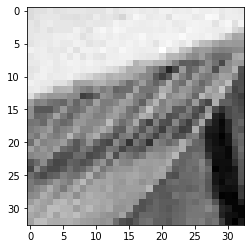

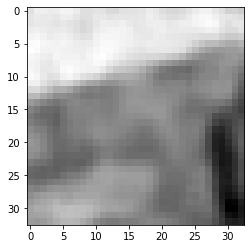

  0%|          | 1/2189 [00:00<11:42,  3.11it/s]

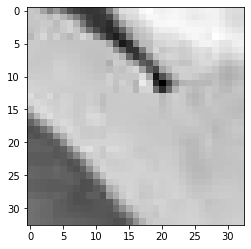

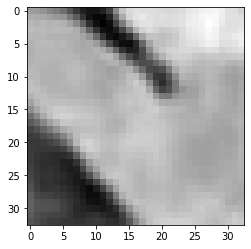

  0%|          | 2/2189 [00:00<11:05,  3.29it/s]

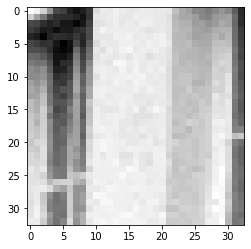

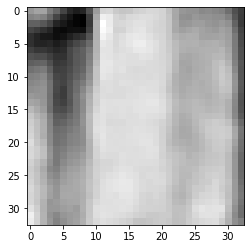

  0%|          | 3/2189 [00:00<10:46,  3.38it/s]

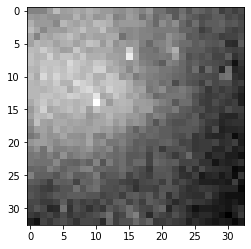

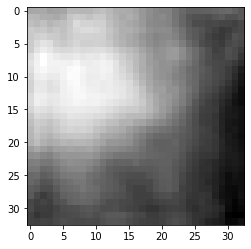

  0%|          | 4/2189 [00:01<10:33,  3.45it/s]

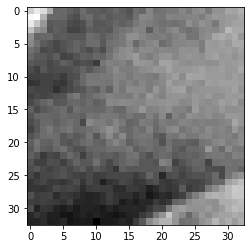

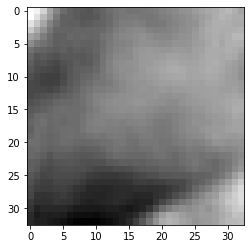

  0%|          | 5/2189 [00:01<10:16,  3.54it/s]

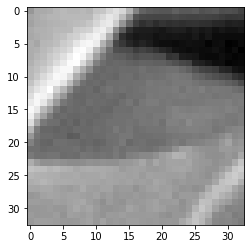

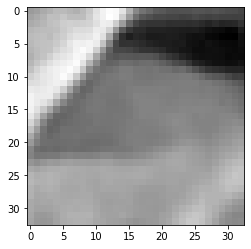

  0%|          | 6/2189 [00:01<10:04,  3.61it/s]

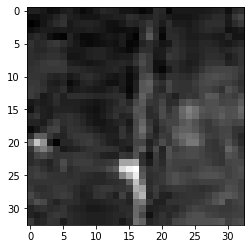

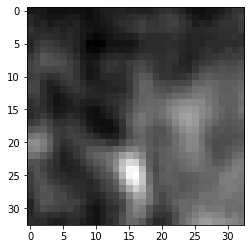

  0%|          | 7/2189 [00:01<10:17,  3.53it/s]

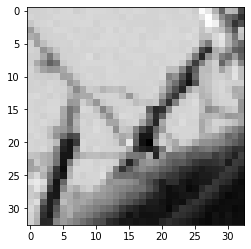

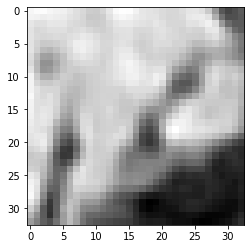

  0%|          | 8/2189 [00:02<11:44,  3.09it/s]

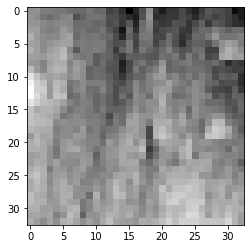

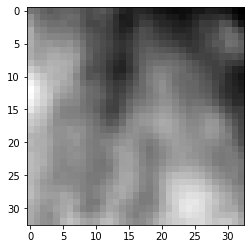

  0%|          | 9/2189 [00:02<11:18,  3.21it/s]

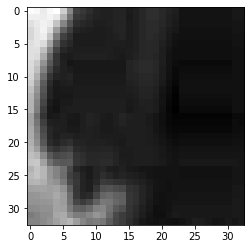

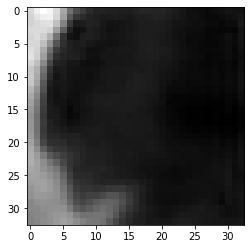

  0%|          | 10/2189 [00:02<10:46,  3.37it/s]

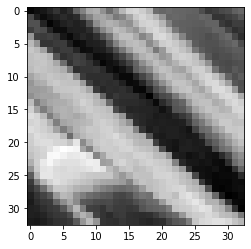

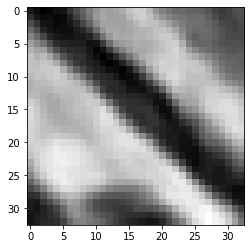

  0%|          | 10/2189 [00:03<11:35,  3.13it/s]


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy
from scipy import io
from sklearn.model_selection import train_test_split
import os

#%% CREATE DATASET

# Read data and create patches
image_dataset = []
pics = sorted(os.listdir('./drive/MyDrive/T91/'))
for pic in tqdm(pics):
    image = cv2.imread('./drive/MyDrive/T91/'+pic)
    image_lum = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
    image_lum = cv2.normalize(image_lum.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    image_lum = image_lum[:,:,0]
    blocks = divide_img_to_blocks(image_lum)
    image_dataset.append(blocks)
    
image_dataset = np.concatenate(image_dataset, axis=0)
A = scipy.io.loadmat('./drive/MyDrive/phi_0_25_1089.mat')["phi"]
#A = reconnet_model.generate_phi()
labels = np.copy(image_dataset)

X_train, X_test, y_train, y_test = train_test_split(image_dataset, image_dataset, test_size=0.1, random_state=333)

# %% BUILD MODEL

graph1 = tf.Graph()
with graph1.as_default():
    tf.set_random_seed(1000)
    num = X_train.shape[0]
    train_dataset = tf.convert_to_tensor(X_train, dtype=tf.float32) 
    train_label = tf.convert_to_tensor(y_train, dtype=tf.float32)
    test_dataset = tf.convert_to_tensor(X_test, dtype=tf.float32) 
    test_label = tf.convert_to_tensor(y_test, dtype=tf.float32)
    
    dataset = tf.data.Dataset.from_tensor_slices(train_dataset)
    dataset = dataset.shuffle(num)
    dataset = dataset.batch(batch_size=128)
    epoch = 250
    iterator = tf.data.Iterator.from_structure(dataset.output_types,
                                               dataset.output_shapes)
    next_element = iterator.get_next()
    training_init_op = iterator.make_initializer(dataset)   
    
    A1 = tf.constant(A.T, dtype=tf.float32)
    
    x = tf.placeholder(tf.float32, shape=[None, 33, 33], name='x')
    x_comp = tf.matmul(tf.reshape(x,(-1,33*33)), A1)
    
    output = reconnet_block(x_comp)
    
    loss = tf.reduce_mean(tf.squared_difference(x, tf.squeeze(output)))
    
    global_step = tf.Variable(0, trainable=False)
    starter_learning_rate = 1e-4
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           100000, 0.9, staircase=True)
    
    # Optimizers
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    
# %% PERFORM TRAINING
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
with tf.Session(graph=graph1, config=config) as sess:
  sess.run(init)

  for i in tqdm(range(1, epoch+1)): #EPOCHS
    print("epoch no {}".format(i))
    sess.run(training_init_op)
    
    if i%20 == 0:
      print("-------Saving model--------")
      saver.save(sess, "./weights_TF_reconnet/weights.ckpt")    
    j=1    
    while(True):
      try:
        batch = sess.run(next_element)
        feed = {x : batch}
        sess.run(optimizer, feed_dict=feed)
          
        if j%30 ==0:
          t_loss = sess.run(loss, feed_dict=feed)
          print("Loss is: %.9f"%(t_loss))
          
        j+=1
         
      except tf.errors.OutOfRangeError:
        break
    

with tf.Session(graph=graph1) as sess:
    sess.run(init)
    saver = tf.train.Saver()
    saver.restore(sess, "./weights_TF_reconnet/weights.ckpt")
    print("in while")
    for i in tqdm(range(X_test.shape[0])):
        feed = {x : np.expand_dims(X_test[i,:,:], axis=0)}
        out = sess.run(output, feed_dict=feed)
        out = cv2.normalize(out, None, 0, 255, cv2.NORM_MINMAX)
        out = np.squeeze(out)
        out = np.uint8(out)
        
        inp = cv2.normalize(X_test[i,:,:], None, 0, 255, cv2.NORM_MINMAX)
        inp = np.uint8(inp)
        
        plt.figure()
        plt.imshow(np.uint8(inp), cmap='gray')
        plt.show()
        
        plt.figure()
        plt.imshow(out, cmap='gray')
        plt.show()
        
        if i==10:
            break
    

INFO:tensorflow:Restoring parameters from ./weights_TF_reconnet/weights.ckpt


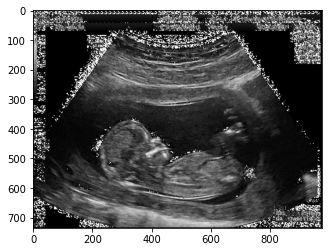

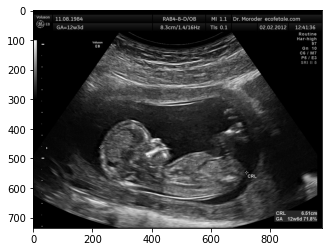

In [ ]:
#  TESTING

test_image = cv2.imread('./drive/MyDrive/ultraSound.jpg')
test_image_lum = cv2.cvtColor(test_image, cv2.COLOR_BGR2YCR_CB)
test_image_lum = test_image_lum[:,:,0]
#test_image_lum = cv2.normalize(test_image_lum.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
test_gray = cv2.imread('./drive/MyDrive/ultraSound.jpg',0)

filter_size = 33
stride = 14
(h,w) = test_image_lum.shape
h_iters = ((h - filter_size) // stride) + 1
w_iters = ((w - filter_size) // stride) + 1
recon_img = np.zeros((h,w))

with tf.Session(graph=graph1) as sess:
    sess.run(init)
    saver = tf.train.Saver()
    saver.restore(sess, "./weights_TF_reconnet/weights.ckpt")

    for i in range(h_iters):
        for j in range(w_iters):
            feed = {x : np.expand_dims(test_image_lum[stride*i:filter_size+stride*i, stride*j:filter_size+stride*j], axis=0)}
            out = sess.run(output, feed_dict=feed)
            out = np.squeeze(out)
            out = np.uint8(out)
            recon_img[stride*i:filter_size+stride*i, stride*j:filter_size+stride*j] = out
            
    plt.figure()
    plt.imshow(recon_img, cmap='gray')
    plt.show()
    
    plt.figure()
    plt.imshow(test_gray, cmap='gray')
    plt.show()
    

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!pip install tensorflow==1.15.0